# Stochastic processes:

phenomenological theory of fluctuating phenomena and models of limited predictability

Major points in Einstein's solution to the problem of Brownian motion

i. The motion is caused by the exceedingly frequent impacts on the pollen grain of the incessantly moving molecules of liquid in which it is suspended.

ii. The motion of these molecules is so complicated that its effect on the pollen grain can only be described probabilistically in terms of exceeedingly frequent statistically independent impacts.

Einstein's explanation of the nature of Brownian motion must be regarded as the beginning of stochastic modelling of natural phenomena.

# Notes from Einstein on Brownian Motion:

$n$ = # particles suspended in a liquid

$\tau$ = time interval

$\Delta$ = an increase in the $x$-coordinates of the individual particles (can be positive or negative)

There will be a certain *frequency law*:

$dn = n\phi(\Delta)d\Delta$

where

$\int_{-\infty}^{\infty} \phi(\Delta)d\Delta = 1$ (note: this means $\phi(\Delta)$ is a probability density function (PDF))

such that $\phi$ is only different from zero for very small values of $\Delta$, and satisfies the condition 

$\phi(\Delta) = \phi(-\Delta)$.

Let $\nu = f(x, t)$ be the numebr of particles per unit volume.

From the definition of $\phi(\Delta)$, one can find the number of particles which at time $t + \tau$ are found between two planes perpendicular to the $x$-axis and passing through the points $x$ and $x + xdx$. One obtains

$f(x, t + \tau)dx = dx \int_{-\infty}^{\infty} f(x + \Delta, t)\phi(\Delta)d\Delta$ (This is the Chapman-Kolmogorov equation.)

(an expectation value of the number of particles per unit volume times an infinitesimal length $dx$ gives the number of particles within that infinitesimal length)

Because $\tau$ is very small,

$f(x, t + \tau) = f(x, t) + \tau \frac{\partial f}{\partial t}.$

In terms of powers of $\Delta$:

$f(x + \Delta, t) = f(x, t) + \Delta \frac{\partial f(x, t)}{\partial x} + \frac{\Delta^2}{2} \frac{\partial^2 f(x, t)}{\partial x^2} + ... = \sum_{i = 0}^{\infty} \frac{\Delta^i}{i!} \frac{ \partial^i f(x, t)}{\partial x^i}$

We can use this series under the [expectation value] integral because only small values of $\Delta$ contribute to this equation.

$f + \frac{\partial f}{\partial \tau}\tau = f \int_{-\infty}^{\infty} \phi(\Delta)d\Delta + \frac{\partial f}{\partial x} \int_{-\infty}^{\infty} \Delta \phi(\Delta)d\Delta + \frac{\partial^2 f}{\partial x^2} \int_{-\infty}^{\infty} \frac{\Delta^2}{2} \phi(\Delta)d\Delta$.

In this context, we define the diffusion coefficient:

$D \equiv \frac{1}{\tau} \int_{-\infty}^{\infty} \frac{\Delta^2}{2} \phi(\Delta)d\Delta$

By keeping on the first and third terms of the right-hand side, the diffusion equation (a special case of the Fokker-Planck equation) is approximated:

$\frac{\partial f}{\partial t} = D \frac{\partial^2 f}{\partial x^2}$.
 
This problem has the solution:

$f(x, t) = \frac{n}{\sqrt{4 \pi D}} \frac{e^{-\frac{x^2}{4Dt}}}{\sqrt{t}}$

The average displacement a particle experiences is $\lambda_x = \sqrt{\bar{x}^2} = \sqrt{2Dt}$.

# Langevin's Equation

From statistical mechanics, $<\frac{1}{2}mv^2> = \frac{1}{2}kT$.

Viscous drag: $-6\pi\eta a \frac{dx}{dt}$ ($\eta$ is viscosity and $a$ is the diameter of the spherical particle.)

The *fluctuating force* $X$ represents the incessant impacts of the molecules of the liquid on the Brownian particle - by Newton's law,

$m \frac{d^2 x}{dt^2} = - 6 \pi \eta a \frac{dx}{dt} + X$

multiplying by $x$,

$\frac{m}{2} \frac{d^2}{dt^2} (x^2) - mv^2 = - 3 \pi \eta a \frac{d(x^2)}{dt} + Xx$ where $v = \frac{dx}{dt}$.

Averaging over a large number of different particles, and using $\langle\frac{1}{2}mv^2\rangle = \frac{1}{2}kT$,

$\frac{m}{2} \frac{d^2 \langle x^2 \rangle}{dt^2} 3 \pi \eta a \frac{d \langle x^2 \rangle}{dt} = kT$ 

The term $\langle xX \rangle = 0$ because it is positive and negative with equal probability; Langevin says because "of the irregularity of the quantity $X$".

One then finds the general solution,

$\frac{d \langle x^2 \rangle}{dt} = \frac{kT}{3 \pi \eta a} + C \exp{(-6\pi\eta a t / m)}$ where $C$ is an arbitrary constant.

"Langevin estimated that teh decaying exponential approaches zero with a time constant of the order of $10^{-8}$s, which for any practical observation at that time, was essential immediately. Thus, for practical purposes, we can neglect this term and integrate once more to get:

$\langle x^2 \rangle - \langle x_0^2 \rangle = [\frac{kT}{3 \pi \eta a}]t $ which corresponds to Einstein's result provided $D = \frac{kT}{6\pi\eta a}$.

The Langevin equation is a *stochastic differential equation* because it has a random term $X$ and its solution is, in some sense, a random function.

Mean distance traveled: 6.836609458983109e-11, in time: 1e-06, gives mean velocity: 6.836609458983109e-05


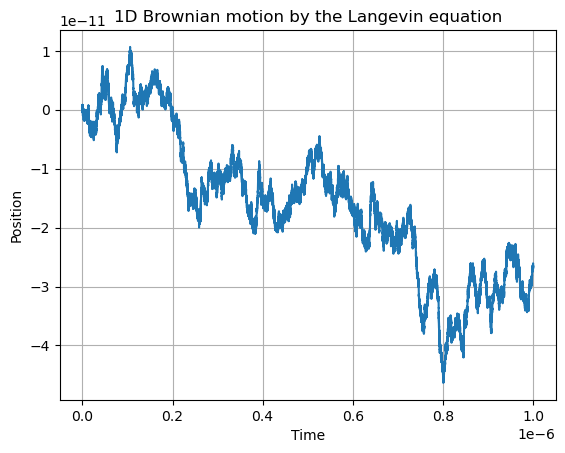

In [5]:
#numerical simulation of 1D brownian motion with the langevin equation
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as k

def brownian_motion(viscosity, diameter, mass, time_step, temperature, num_steps):
    
    #calculate mean distance traveled
    net_time = time_step * num_steps
    mean_distance_traveled = np.sqrt(k * temperature  / (3 * np.pi * viscosity * diameter) * net_time)
    
    print(f"Mean distance traveled: {mean_distance_traveled}, in time: {net_time}, gives mean velocity: {mean_distance_traveled / net_time}")

    #spatiotemporal parameters
    time = time_step * np.arange(0, num_steps)
    velocity = np.zeros(num_steps)
    position = np.zeros(num_steps)
    acceleration = np.zeros(num_steps)

    # Scaling the noise term for temperature and time
    noise_scaling = np.sqrt(k * temperature / net_time)
    gauss_noise = np.random.normal(0, noise_scaling, num_steps)
    
    #computing evolution
    for t in range(num_steps - 1):
        acceleration[t] = (1/mass)*(-6*viscosity*np.pi*diameter*velocity[t] + gauss_noise[t])
        velocity[t + 1] = velocity[t] + acceleration[t] * time_step
        position[t + 1] = position[t] + velocity[t] * time_step

    #plotting 1D motion
    plt.plot(time, position)
    plt.title('1D Brownian motion by the Langevin equation')
    plt.xlabel ('Time')
    plt.ylabel('Position')
    plt.grid(1)
    plt.show()

brownian_motion(viscosity=0.934, diameter=10**(-7), mass=1.01*10**(-17), time_step=10**(-12), temperature=298, num_steps=10**6) #10nm gold nanoparticle in glycerin at room temp on a picosecond timescale (SI Units)   

# Brownian motion as a Markov Model